Varianza explicada por cada componente principal:
Componente 1: 0.7296
Componente 2: 0.2285
Componente 3: 0.0367


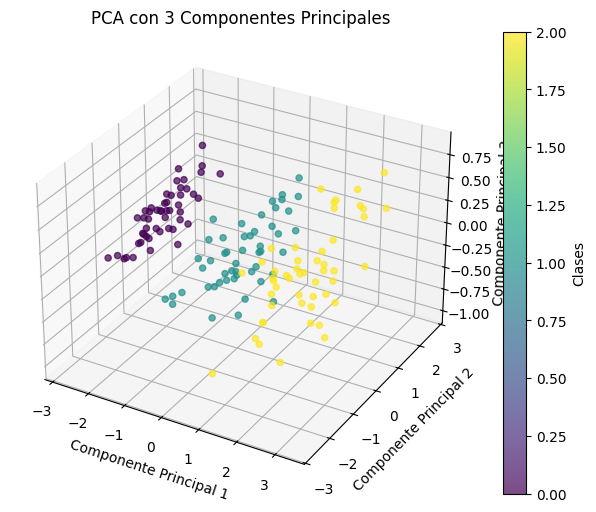

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D

# 📌 Cargar el dataset de ejemplo (Iris)
iris = load_iris()
X = iris.data  # Variables predictoras
y = iris.target  # Etiquetas de clase
feature_names = iris.feature_names  # Nombres de las variables

# 📌 Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Aplicar PCA para reducir a 3 componentes principales
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 📌 Crear un DataFrame con los 3 primeros componentes principales
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3"])
df_pca["Clase"] = y  # Agregar la clase original para visualización

# 📌 Mostrar la varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
for i, var in enumerate(varianza_explicada):
    print(f"Componente {i+1}: {var:.4f}")

# 📌 Visualización en 3D de los componentes principales
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca["PC1"], df_pca["PC2"], df_pca["PC3"], c=df_pca["Clase"], cmap="viridis", alpha=0.7)
ax.set_xlabel("Componente Principal 1")
ax.set_ylabel("Componente Principal 2")
ax.set_zlabel("Componente Principal 3")
ax.set_title("PCA con 3 Componentes Principales")
plt.colorbar(scatter, label="Clases")
plt.show()
